In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import scipy
from scipy import signal

In [2]:
data = np.genfromtxt("data/resistances-A5A5A4A4.csv", delimiter=",", skip_header=1)
data = data[:-2]
(dataNum, sensorNum) = np.shape(data)
x = np.arange(0,dataNum)
dataNum

2174

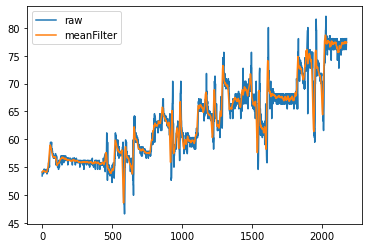

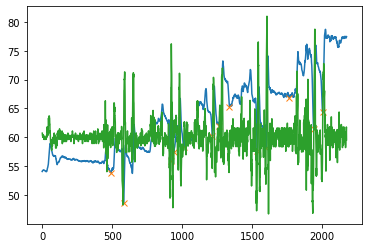

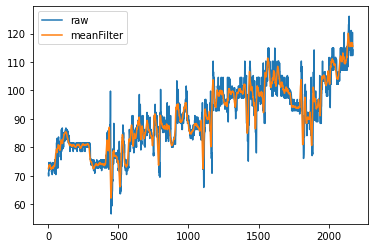

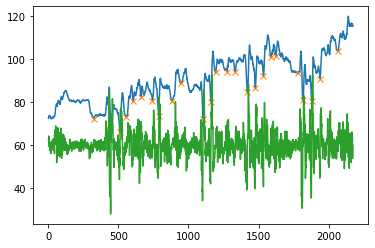

In [14]:
for i in range(sensorNum):
    # apply mean filter
    meanFilter = scipy.ndimage.filters.uniform_filter1d(data[:,i],11, origin=-5)
    # find peaks mean filter
    negativeData = -meanFilter
    peaks, _ = scipy.signal.find_peaks(negativeData, prominence=5)
    plt.plot(x, data[:,i], label="raw")
    plt.plot(x, meanFilter, label="meanFilter")
    plt.legend()
    plt.show()
    plt.plot(x, meanFilter, label="meanFilter")
    plt.plot(peaks, meanFilter[peaks], "x", label="peaks")
    plt.plot(x[1:], np.diff(meanFilter)*10+60, label="meanFilter")
    plt.show()


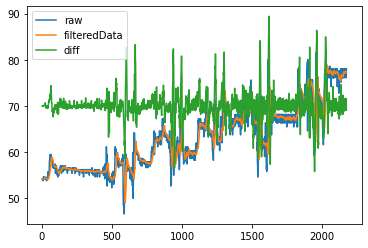

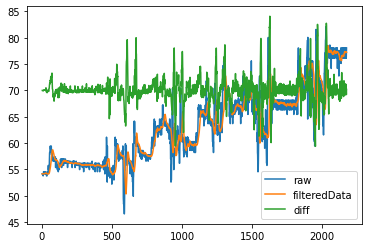

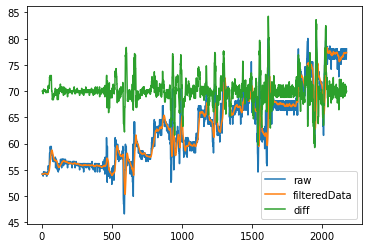

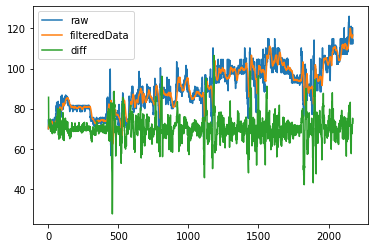

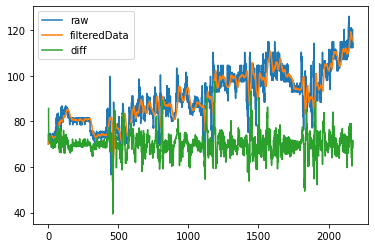

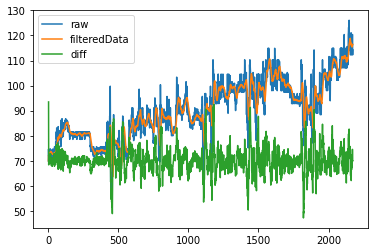

array([ 2.347935  , -0.16455167,  0.27063167, ...,  0.453542  ,
        0.        ,  0.        ])

In [15]:
# apply my low pass filter
coeff1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
coeffL = [
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

def low_pass_filter(arr, i, fl, coeff):
    if i == 0:
        return 0

    res = 0;
    div = 0;
    m = min(i, fl);
    for n in range(m):
        res += coeff[n]*arr[i-1-n]
        div += coeff[n]
    return res/div;

def applyFilter(arr, f, fid):
    coeff = coeffL[fid]
    (l, ) = np.shape(arr);
    res = np.ones(l)
    for i in range(l):
        res[i] = f(arr, i+1, len(coeff), coeff)
    return res

for i in range(sensorNum):
    for j in range(len(coeffL)):
        filteredData = applyFilter(data[2:, i], low_pass_filter, j)
        plt.plot(x[2:], data[2:,i], label="raw")
        plt.plot(x[2:], filteredData, label="filteredData")
        plt.plot(x[3:], np.diff(filteredData)*10+70, label="diff")
        plt.legend()
        plt.show()
np.diff(filteredData)

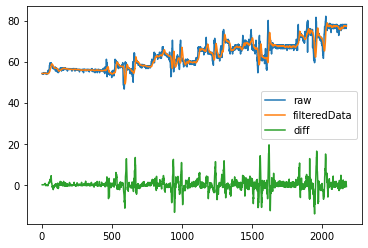

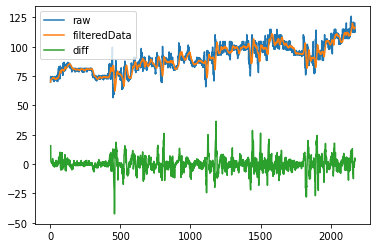

In [11]:
def applyFilter(arr, f, coeff):
    (l, ) = np.shape(arr);
    res = np.ones(l)
    for i in range(l):
        res[i] = f(arr, i+1, len(coeff), coeff)
    return res

for i in range(sensorNum):
    filteredData = applyFilter(data[2:, i], low_pass_filter, coeff1)
    plt.plot(x[2:], data[2:,i], label="raw")
    plt.plot(x[2:], filteredData, label="filteredData")
    plt.plot(x[3:], np.diff(filteredData)*10, label="diff")
    plt.legend()
    plt.show()
    # find peaks
#     plt.plot(x[2:], filteredData, label="filteredData")
#     peaks, _ = scipy.signal.find_peaks(-filteredData, prominence=5)
#     plt.plot(peaks, filteredData[peaks], "x")
#     plt.legend()
#     plt.show()

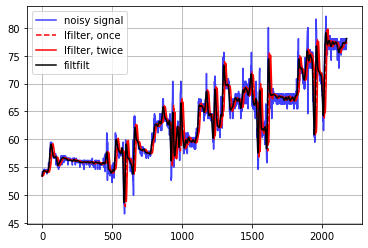

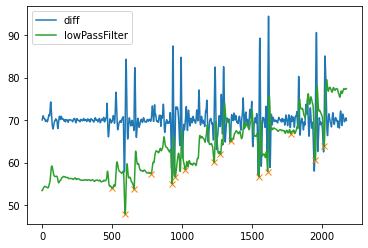

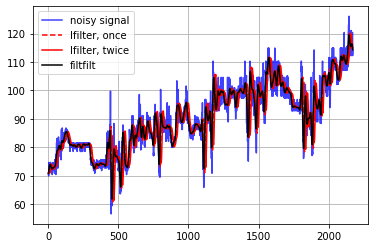

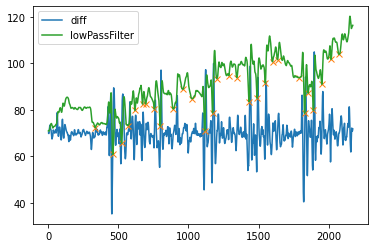

In [6]:
# apply low pass filter
for i in range(sensorNum):
    b, a = signal.butter(3, 0.1)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, data[:,i], zi=zi*data[0,i])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, data[:,i])
    plt.figure
    plt.plot(x, data[:,i], 'b', alpha=0.75)
    plt.plot(x, z, 'r--', x, z2, 'r', x, y, 'k')
    plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
                'filtfilt'), loc='best')
    plt.grid(True)
    plt.show()
    # find peaks with low pass filter
    plt.plot(x[1:], np.diff(z)*10+70, label="diff")
    peaks, _ = scipy.signal.find_peaks(-z, prominence=5)
    plt.plot(peaks, z[peaks], "x")
    plt.plot(x, z, label="lowPassFilter")
    plt.legend()
    plt.show()
    len(peaks)